<a href="https://colab.research.google.com/github/priyankagupta0/A_star-Search-Algorithm-for-Irregular-6x6-Sudoku/blob/main/Time_Series!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is time series data?

###Time Series data is a type of data that is divided into intervals of time. Here the order encodes information.

### Hence, the time series analysis is a statistical technique that is used to extract meaningful insights and pattern from the time series data.
- Understanding the past
- Forecasting the future

- could be daily, weekly, monthly, yearly, etc.

Characteristics:
1. chronological
2. sequential
3. temporal components - trends, seasonality, cycle, noise
4. constant frequency
5. dyanmic nature - external factor sensitive


In [68]:
# import yfinance as yf
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import warnings
# warnings.filterwarnings('ignore')

# stock_data = yf.download('AAPL', start='2025-01-01')
# stock_data.to_csv("AAPL_2025.csv")
# stock_data.head()

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df =  pd.read_csv("AAPL_2025.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume
0,05/09/2025,199.00,200.54,197.54,198.53,"36,453,922"
1,05/08/2025,197.72,200.05,194.68,197.49,"50,478,871"
2,05/07/2025,199.17,199.44,193.25,196.25,"68,616,945"
3,05/06/2025,198.21,200.65,197.02,198.51,"51,216,480"
4,05/05/2025,203.10,204.10,198.21,198.89,"69,018,445"
5,05/02/2025,206.09,206.99,202.16,205.35,"101,010,602"
6,05/01/2025,209.08,214.56,208.90,213.32,"57,365,680"
7,04/30/2025,209.30,213.58,206.67,212.50,"52,286,449"
8,04/29/2025,208.69,212.24,208.37,211.21,"36,827,633"
9,04/28/2025,210.00,211.50,207.46,210.14,"38,743,070"


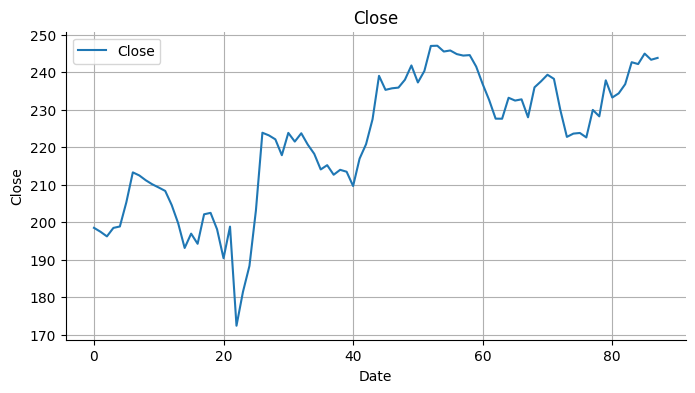

In [70]:
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid()
plt.gca().spines[['top', 'right']].set_visible(False)

### Hidden beneath the surface are patterns, and those patterns often come in three flavors: trend, seasonality, and noise.

- Trend - The long-term progression of the series (upward/downward)
- Seasonality - Captures repeating cycles at fixed interval. These are periodic fluctuations that occur at regular intervals due to predictable forces—like weekly sales patterns, daily website traffic peaks, or yearly rainfall
- Noise - This is the randomness, the one-off events, the outliers

To see these components more clearly, we use something called time series **Decomposition**.

### Types of Decomposition
- Additive
- Multiplicative

In [71]:
# @title #CLassical Time series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(df['Close'], model='additive', period = 7)
 #decomposition_multiplicative = seasonal_decompose(df['Close'], model='multiplicative', period = 30)
 # we are not using mulitplicative model since the AAPL stock looks additive

In [72]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

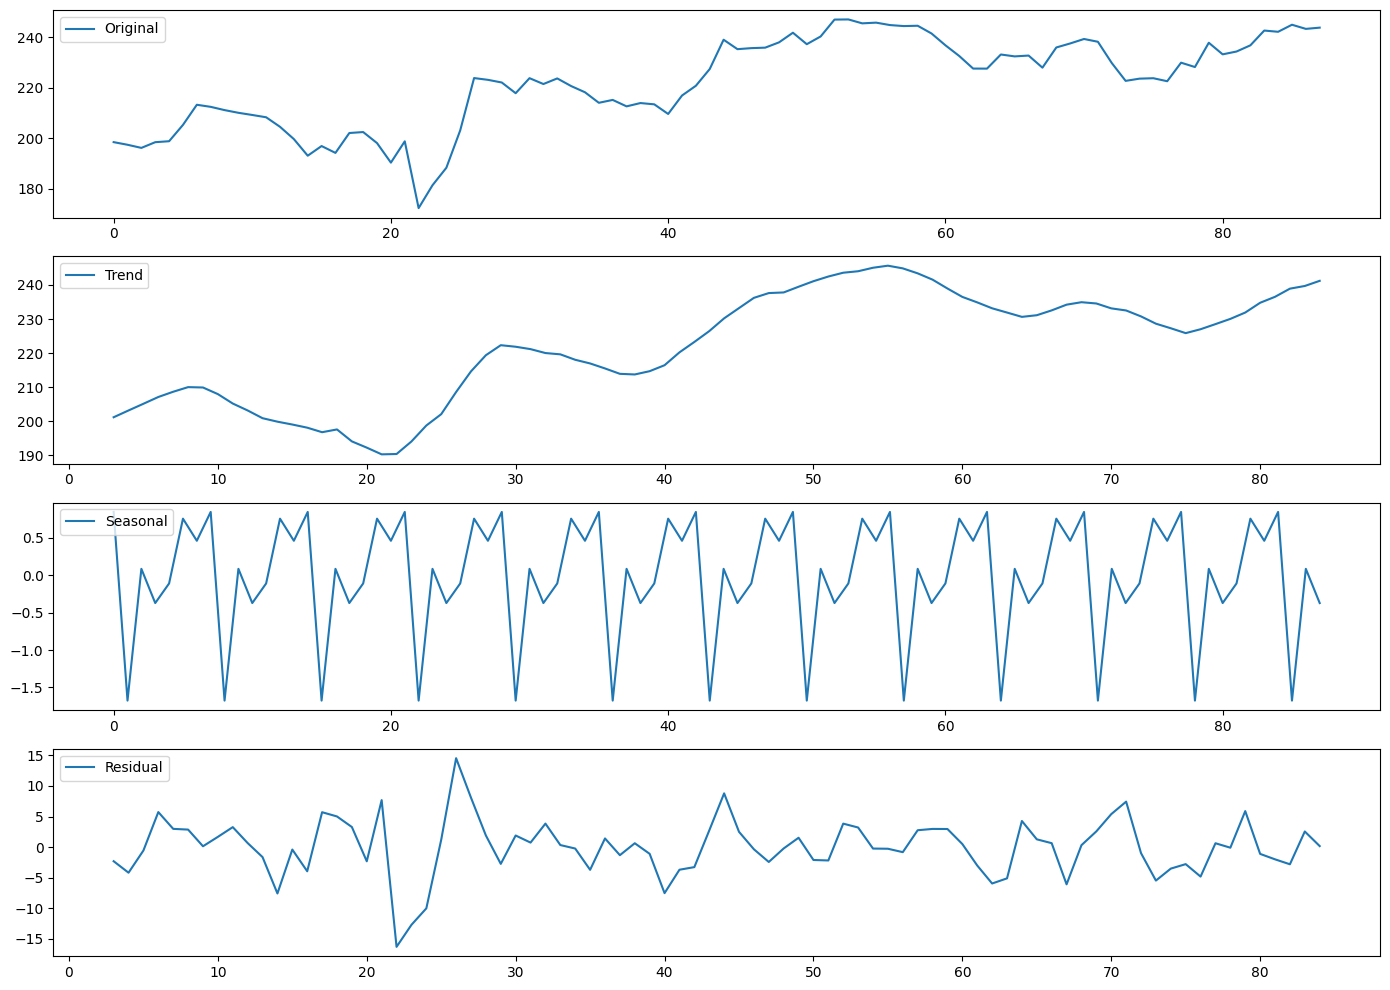

In [73]:
plt.figure(figsize=(14, 10))
plt.subplot (411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot (412)
plt.plot(trend_additive, label='Trend')
plt.legend(loc='upper left')
plt.subplot (413)
plt.plot(seasonal_additive, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot (414)
plt.plot(residual_additive, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


- Easily influenced by outliers
- Can handle both, multi and additive

The outliers can be handled by STL decomposition

In [74]:
# @title # STL Decomposition using LOESS (Locally Estimated Scatter Smoothening)

from statsmodels.tsa.seasonal import STL

stl = STL(df['Close'], period = 7)
res = stl.fit()

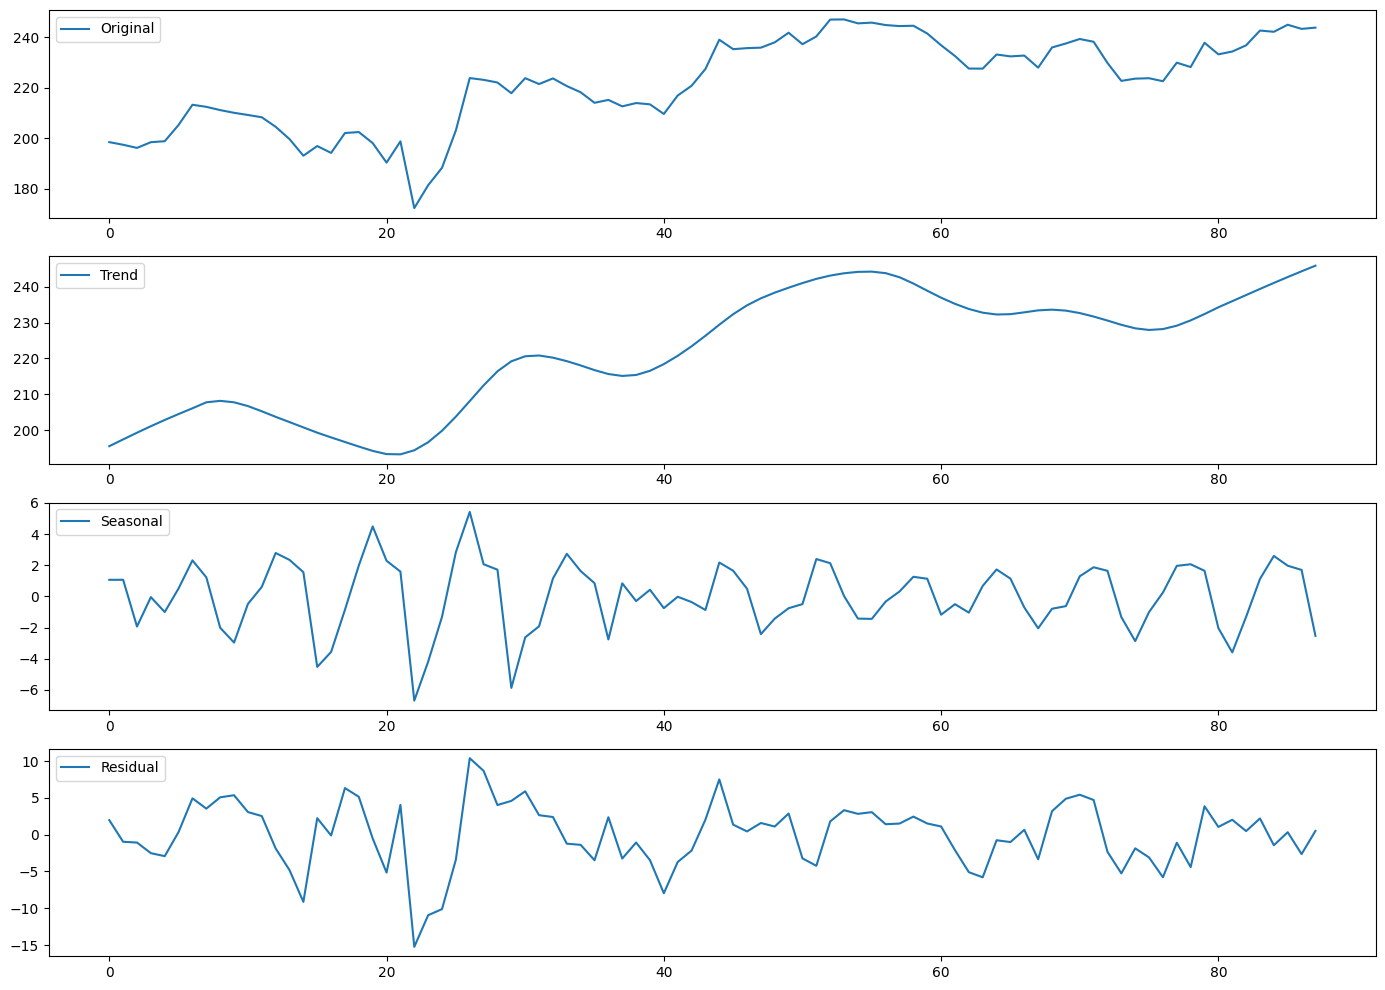

In [75]:
plt.figure(figsize=(14, 10))
plt.subplot (411)
plt.plot(res.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot (412)
plt.plot(res.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot (413)
plt.plot(res.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot (414)
plt.plot(res.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Stationarity

In plain terms, stationarity means that the rules of the game don't change over time.

A stationary time series has a constant mean, constant variance, and consistent behavior across time.

This is important because if the data's behavior changes over time, we can't reliably model it.

### Why do we need it?
It makes predictionm easier, as it assumes the same statistical properties through time, and forecasting models assumes data is stationary

###Types of Stationarity
 - Week Stationarity - Should have the constant Mean, Variance, Auto Correlation
 - Strict Stationarity - Week Stationarity + joint stationarity remains unchanged when shifted along any time period. Hence not only do each of the series have constant mean and variance, but their relationship to each other (like correlation) also doesn't change over time.


Weak - Use this in most practical applications like ARIMA models, forecasting, econometrics.

 Strict - Use when you're working with theory-heavy models or proofs (e.g., in academic or statistical research).

# Testing for Stationarity

##For weak - ADF, KPSS test

- ADF Test - Checks presence of Unit root, which is any non stationary trend.

Two hypothesis are there: h0(Null), h1(Alternate)
h0 -  Data has a unit root (data is non stationary)
h1 - Data has no unit root (data is stationary)

Decision criteria ->

1.   If p<0.05, then data is stationary
2.   ADF statistic < critical value, we reject h0

- KPSS Test - It fits a constant mean model on the data and measure the variance of the cummulative sum of the residuals

h0 - stationary
h1 - non-stationary

Decision criteria ->

1.   If p<0.05, then data is non-stationary
2.   KPSS statistic > critical value, we reject h0

## For strict - 1st check weak, then KS test

- KS test - compare the cummulative distribution functions of two samples.

If p > 0.05, there is no difference, hence strict stationary

In [76]:
# @title Stationary Test (Weak)
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Close'])
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],2)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')

ADF Statistic: -1.58
p-value: 0.5
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.58


From the above results, the p value indicates a strong non-stationarity

In [77]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df['Close'], regression='ct') # 'c' -> constant (level stationarity), 'ct' -> trend
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {round(kpss_test[1],2)}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
    print(f'{key}: {round(value,2)}')

KPSS Statistic: 0.15
p-value: 0.05
Critical Values:
10%: 0.12
5%: 0.15
2.5%: 0.18
1%: 0.22


Again the results indicate that the data is non-stationary

KS Statistic: 0.05
p-value: 0.89
KS Statistic: 0.23
p-value: 0.0


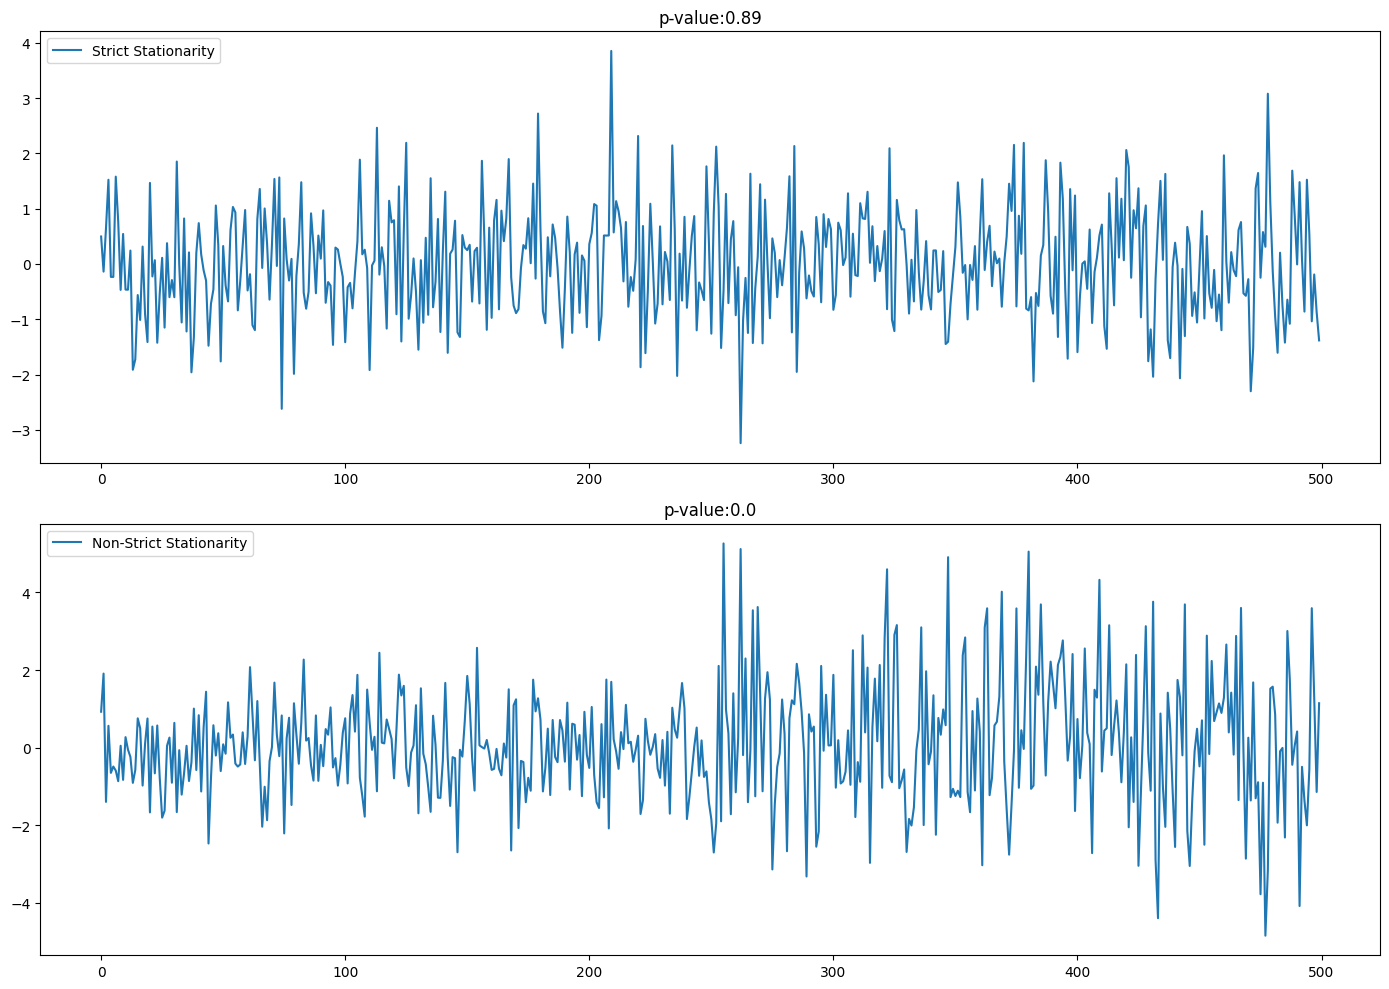

In [78]:
# @title Stationarity Test (Strict)

# Lets generate synthetic data to look into it!
from scipy.stats import ks_2samp

np.random.seed(42)
n = 500

# Strict stationarity series: normally distributed with some noise
strict_stationarity_series = np.random.normal(0,1,n)

# Non strict stationarity
non_strict_stationarity_series = np.concatenate((
    np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2))
)

def ks_test(series):
    split = len(series)//2
    series_1 = series[:split]
    series_2 = series[split:]
    stat, p_value = ks_2samp(series_1, series_2)
    return stat, p_value

# ks test on the strict one
ks_stat_strict, ks_p_value_strict = ks_test(strict_stationarity_series)
print(f'KS Statistic: {round(ks_stat_strict,2)}')
print(f'p-value: {round(ks_p_value_strict,2)}')

# ks test on the non strict one
ks_stat_non_strict, ks_p_value_non_strict = ks_test(non_strict_stationarity_series)
print(f'KS Statistic: {round(ks_stat_non_strict,2)}')
print(f'p-value: {round(ks_p_value_non_strict,2)}')

plt.figure(figsize=(14, 10))
plt.subplot (211)
plt.title(f'p-value:{round(ks_p_value_strict, 2)}')
plt.plot(strict_stationarity_series, label='Strict Stationarity')
plt.legend(loc='upper left')
plt.subplot (212)
plt.title(f'p-value:{round(ks_p_value_non_strict, 2)}')
plt.plot(non_strict_stationarity_series, label='Non-Strict Stationarity')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Making the Non stationary dataset to Stationary

- Differencing: Subtract consecutive observations to remove trends.

- Log Transformation: Apply logarithm to stabilize variance (especially for exponential growth).


- Seasonal Differencing: Subtract values at the same season from previous periods.

- Decomposition: Remove trend and seasonality by decomposing the time series (e.g., using STL decomposition) and analyzing the residual.



In [79]:
#@title Making data Stationary

prices = df["Close"]
prices.head()

,Close
0,198.53
1,197.49
2,196.25
3,198.51
4,198.89


In [80]:
# First order diff
prices_diff = prices.diff()
prices_diff

,Close
0,NaN
1,-1.04
2,-1.24
3,2.26
4,0.38
...,...
83,5.85
84,-0.49
85,2.79
86,-1.64


In [81]:
# Second order Diff
#prices.diff().diff()

In [82]:
from scipy import stats

# log transformation
prices_log = np.log(prices)

# Square root transformation
prices_sqrt = np.sqrt(prices)

# box-cox transformation (needs all pos values)
prices_boxcox, lam = stats.boxcox(prices[prices>0])

In [83]:
adf_test = adfuller(prices_log)
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],2)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')


ADF Statistic: -1.68
p-value: 0.44
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.58


Still not stationary

In [84]:
adf_test = adfuller(prices_sqrt)
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],2)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')


ADF Statistic: -1.62
p-value: 0.47
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.58


Still not stationary

In [85]:
adf_test = adfuller(prices_boxcox)
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],2)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')

ADF Statistic: -1.36
p-value: 0.6
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.58


Still not stationary

In [86]:
adf_test = adfuller(prices_diff.dropna())
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],6)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')

ADF Statistic: -5.62
p-value: 1e-06
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.59


Finally stationary

All the transformations didnt work because the variance in our data is not high

In [87]:
from scipy import signal
#Using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

In [88]:
adf_test = adfuller(prices_detrended)
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],6)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')

ADF Statistic: -3.17
p-value: 0.021535
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.59


In [89]:
#Using a moving average to remove trend
window = 12 # example window size
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [90]:
adf_test = adfuller(prices_detrended)
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],6)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')

ADF Statistic: -2.92
p-value: 0.043314
Critical Values:
1%: -3.53
5%: -2.9
10%: -2.59


In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal decomposition with moving average
decomposition = seasonal_decompose(prices, model='additive', period = 7)
prices_adjusted = prices-decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [92]:
adf_test = adfuller(prices_adjusted)
print(f'ADF Statistic: {round(adf_test[0],2)}')
print(f'p-value: {round(adf_test[1],6)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'{key}: {round(value,2)}')

ADF Statistic: -1.57
p-value: 0.498613
Critical Values:
1%: -3.51
5%: -2.9
10%: -2.58


### White Noise
- Random, uncorrelated data with constant mean and variance.

No predictable pattern.

### Random Walk:
- A process where each value depends on the previous one with random steps.

Example: Stock prices changing randomly day by day.

### How to identify if the data is White Noise or Random walk?

1. Visually
2. ACF & PACF plot
3. Ljung Test box - if p<0.05, then random walk

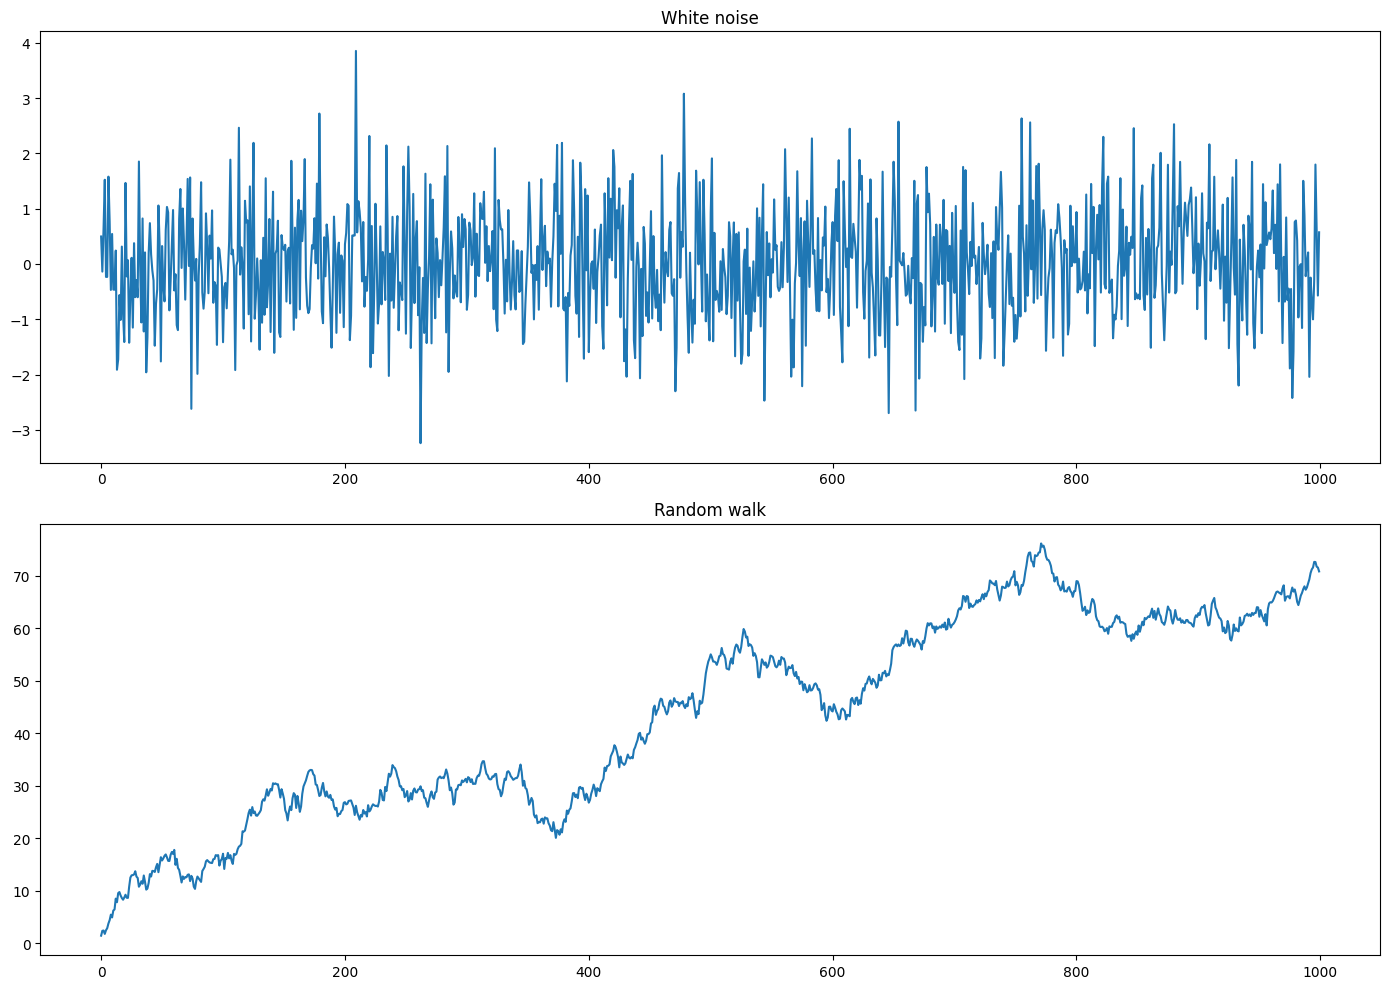

Ljung-box test for white noise
     lb_stat  lb_pvalue
10  7.710808   0.657061
Ljung-box test for random walk
        lb_stat  lb_pvalue
10  9539.508347        0.0


In [93]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Generating white noise and random walk for comparision
np.random.seed(42)
n = 1000

# White noise
white_noise = np.random.normal(0,1,n)

# Random walk
random_walk = np.cumsum(np.random.normal(0,1,n))

#Plot
plt.figure(figsize=(14, 10))
plt.subplot (211)
plt.title("White noise")
plt.plot(white_noise, label='White Noise')
plt.subplot (212)
plt.title("Random walk")
plt.plot(random_walk, label='Random Walk')
plt.tight_layout()
plt.show()

#Ljung-box test
print("Ljung-box test for white noise")
print(acorr_ljungbox(white_noise, lags=[10], return_df=True))
print("Ljung-box test for random walk")
print(acorr_ljungbox(random_walk, lags=[10], return_df=True))#

# Time series Forecasting models

### Univariate models

1. AR (Autoregressive)

- Uses past values to predict future ones.
- Order of AR is denoted by 'p', no. of lagged observations

2. MA (Moving Average)

- Uses past error terms (residual) for forecasting.
- Order of MA id 'q', no. of lagged error terms

3. ARMA (AutoRegressive Moving Average)

- Combines AR and MA.
- Captures both temporal dependencies and error terms
- Order (p,q)

4. ARIMA (AutoRegressive Integrated Moving Average)

- Adds differencing to handle non-stationary data.
- Order (p,d,q)

5. SARIMA (Seasonal ARIMA)

- Extends ARIMA to handle seasonality.

### Multivariate models - uses multiple time series and their dependencies on eachother to predict future.

6. VAR (Vector AutoRegression)

- Generalizes AR to handle multiple interdependent time series.

7. VMA (Vector Moving Average)

- MA model generalized to multivariate data.

8. VARMA (Vector AutoRegressive Moving Average)

- Extension of ARMA to multivariate cases.

9. VARIMA (Vector AutoRegressive Integrated Moving Average)

- VARMA + differencing to handle non-stationary multivariate data.




In [94]:
#@title #Time Series Forecasting- AR model

apple_price_stationary = df['Close'].diff().dropna()

# Split into train and testing datasets
train_size = int(len(apple_price_stationary) * 0.8)
train_data, test_data = apple_price_stationary[:train_size], apple_price_stationary[train_size:]

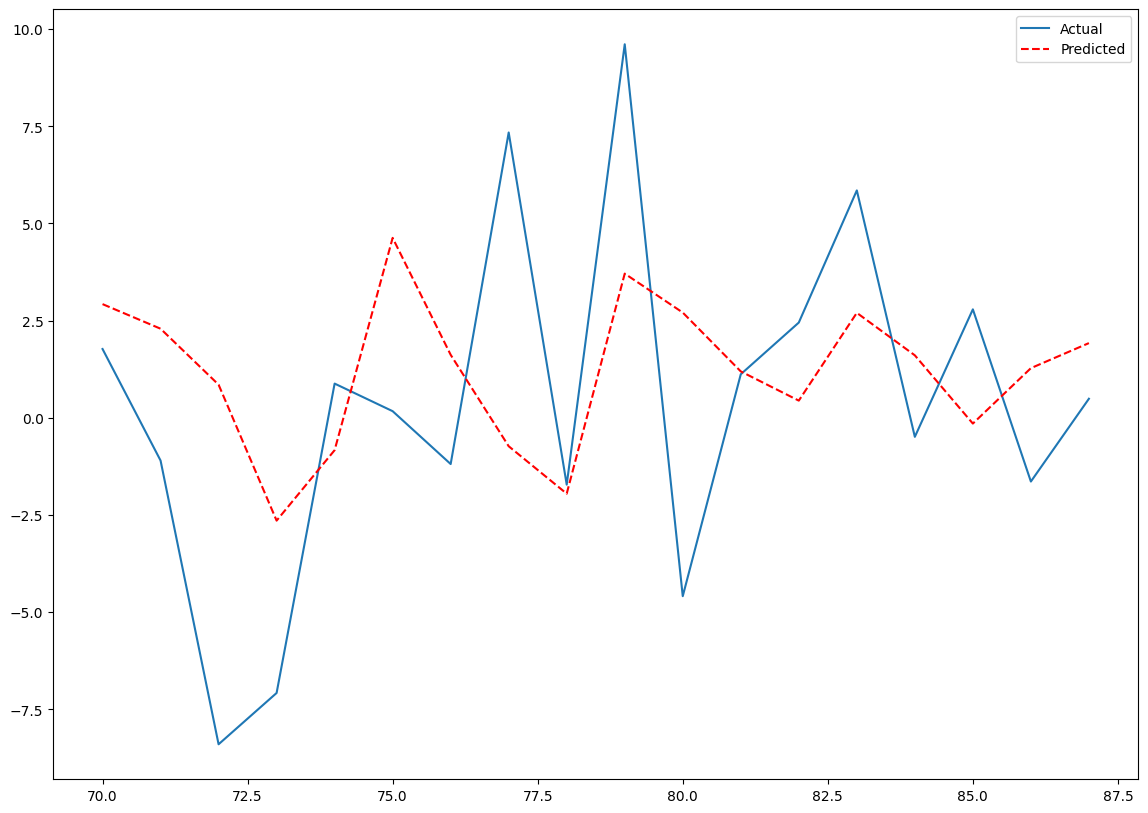


Root Mean Squared Error (RMSE): 4.343934693541644


In [95]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

#fit AR on the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

#Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic = False)

# Plot the actual vs predicted vals
plt.figure(figsize = (14, 10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red',linestyle="--" ,label='Predicted')
plt.legend()
plt.show()

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRoot Mean Squared Error (RMSE): {rmse}')

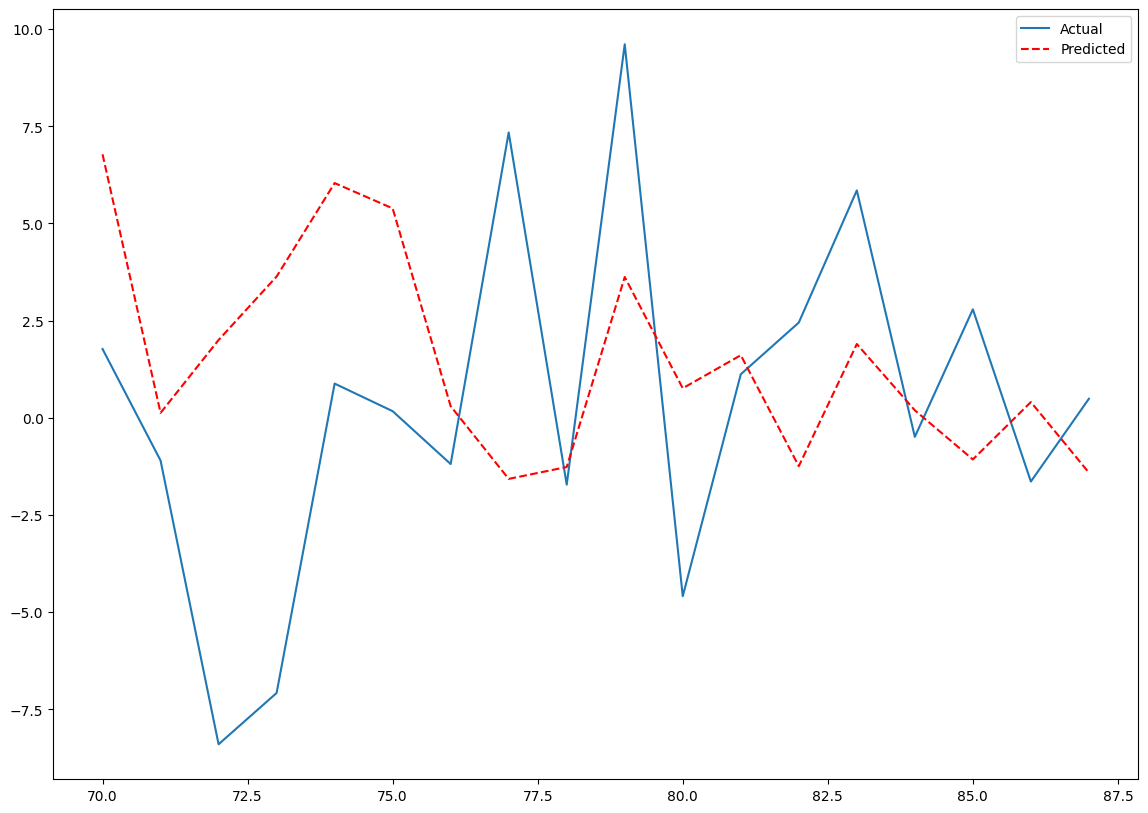


Root Mean Squared Error (RMSE): 5.28325305837208


In [96]:
#@title #MA model
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA

# Fit the MA model to the training data
model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plot the actual vs predicted vals
plt.figure(figsize = (14, 10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red',linestyle="--" ,label='Predicted')
plt.legend()
plt.show()

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRoot Mean Squared Error (RMSE): {rmse}')

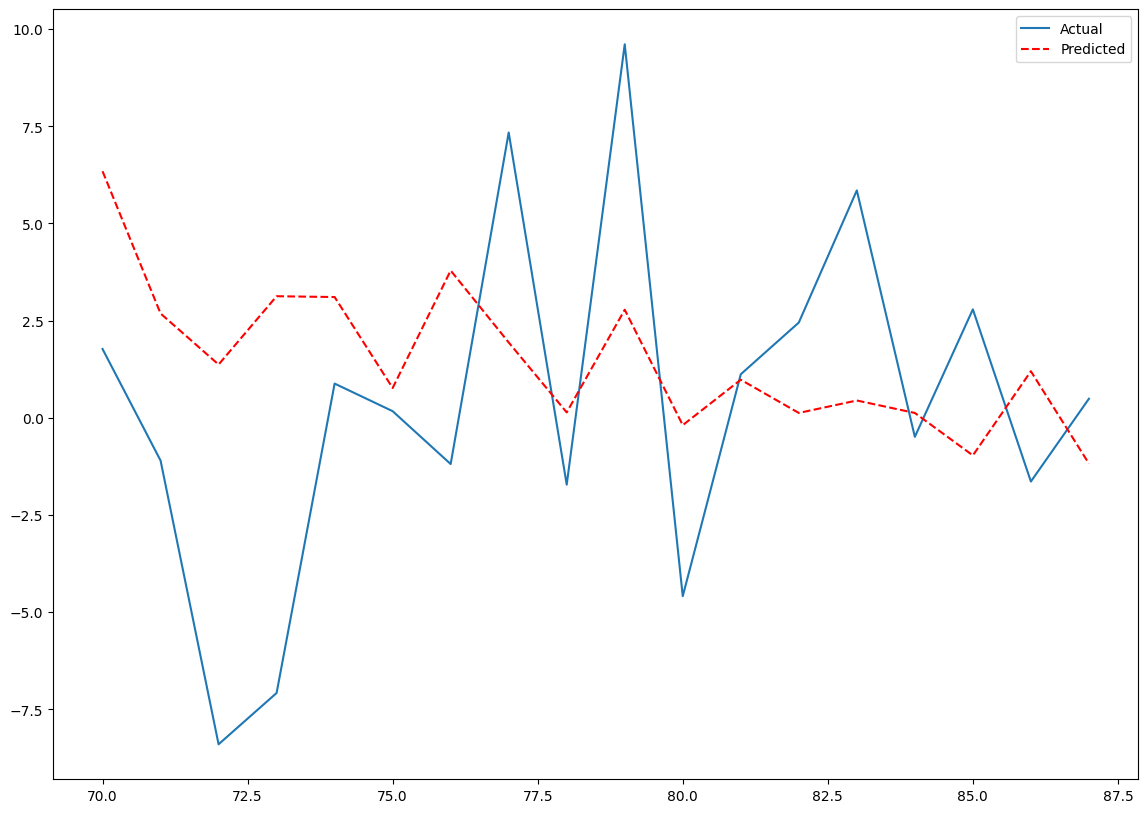


Root Mean Squared Error (RMSE): 4.8511622055387935


In [97]:
#@title #ARMA model

model = ARIMA(train_data, order=(10,0,7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red', linestyle="--", label='Predicted')
plt.legend()
plt.show()

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRoot Mean Squared Error (RMSE): {rmse}')

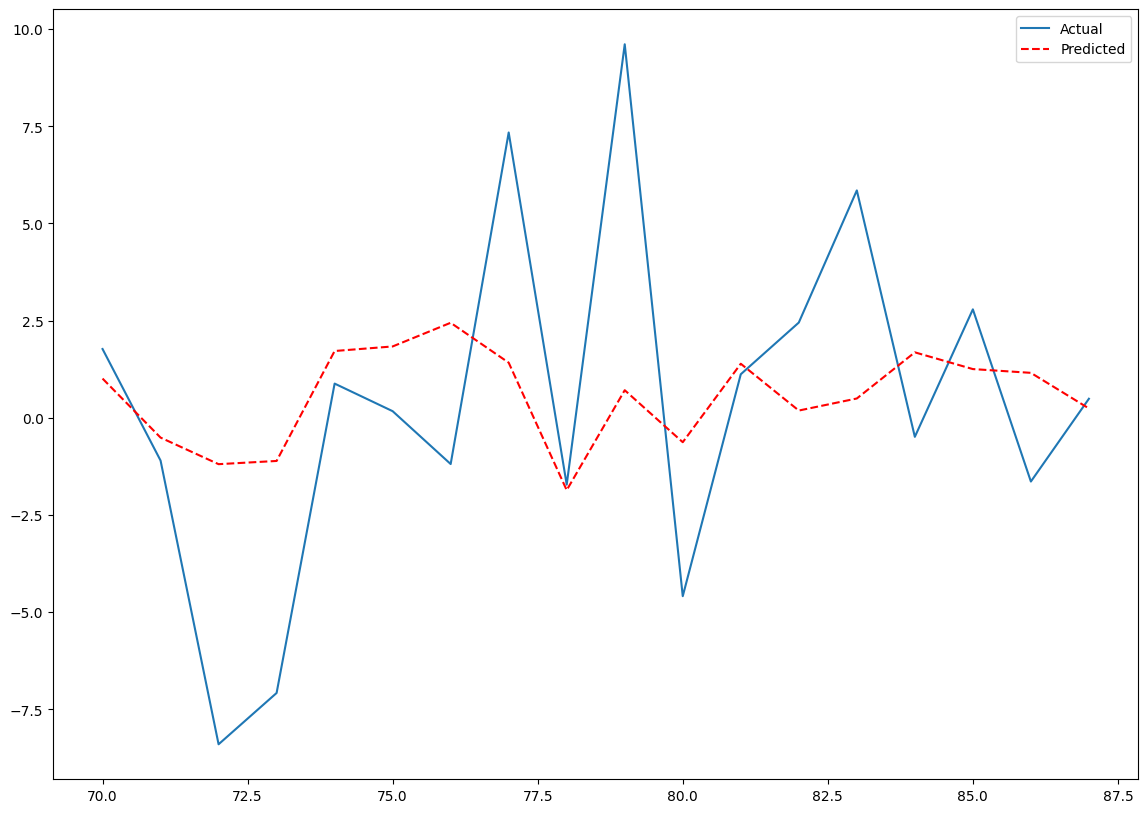


Root Mean Squared Error (RMSE): 3.9722341489765793


In [98]:
#@title #ARIMA model

model = ARIMA(train_data, order=(10,1,10))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red', linestyle="--", label='Predicted')
plt.legend()
plt.show()

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRoot Mean Squared Error (RMSE): {rmse}')

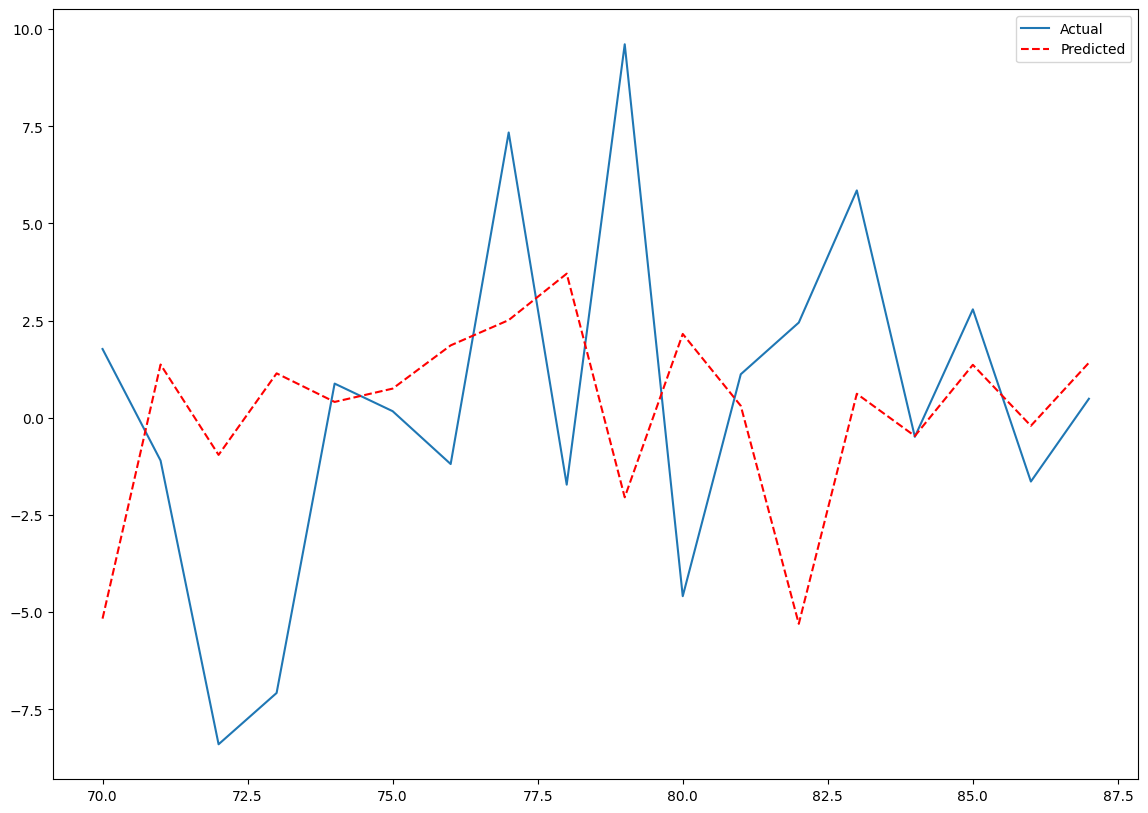


Root Mean Squared Error (RMSE): 5.345754895584827


In [99]:
#@title #SARIMA model

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data, order=(7,1,7), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Make predictions of the test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red', linestyle="--", label='Predicted')
plt.legend()
plt.show()

# Evaluating the model using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRoot Mean Squared Error (RMSE): {rmse}')

# Smoothing Methods
Importance of Smoothing:
- Reduces noise: Highlights patterns/trends more clearly.

- Improves forecast accuracy: Removes short-term fluctuations.

- Prepares data: Better input for models (like ARIMA).

1. Moving Average (MA):
- Averages a fixed number of past values.

- Simple and effective for trend smoothing.

- Example: MA(3) averages last 3 points.

2. Exponential Smoothing:
- Weights recent data more heavily (uses decay factor α).

- Reacts faster to changes than MA.

- Variants: Simple, Double (trend), and Triple (trend + seasonality).

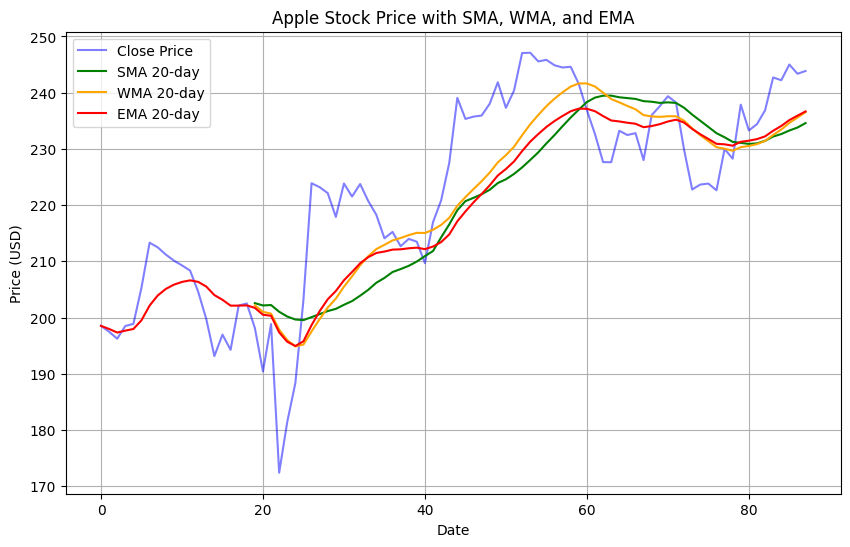

In [100]:
#@title Moving Average

window_size = 20
df['SMA'] = df['Close'].rolling (window=window_size).mean()
#Calculate Weighted Moving Average (WMA)
weights= np.arange(1, window_size + 1)
df['WMA'] = df['Close']. rolling (window_size).apply(lambda prices: np.dot (prices, weights) / weights.sum(), raw=True)
#Calculate Exponential Moving Average (EMA)
df['EMA'] = df['Close'].ewm (span= window_size).mean()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['SMA'], label=f'SMA {window_size}-day', color='green')
plt.plot(df['WMA'], label=f'WMA {window_size}-day', color='orange')
plt.plot(df['EMA'], label=f'EMA {window_size}-day', color='red')
plt.title('Apple Stock Price with SMA, WMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

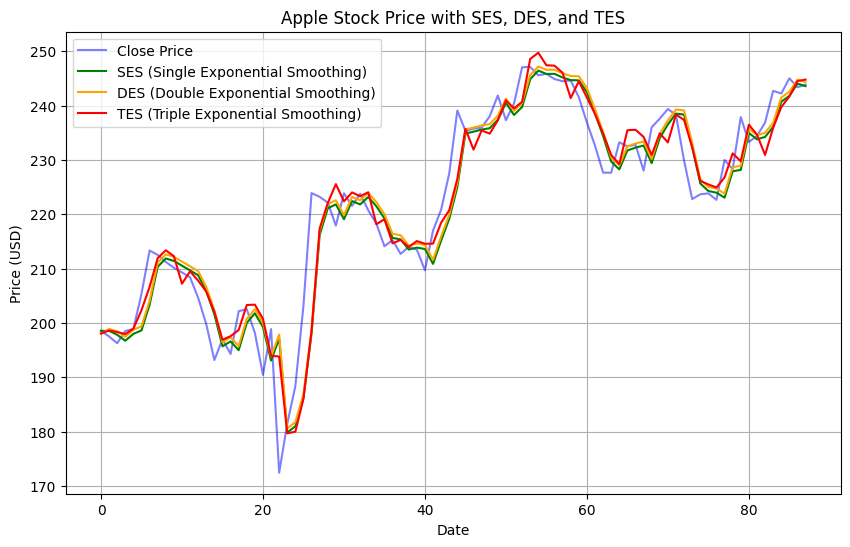

In [101]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = df['Close']
ses_model = SimpleExpSmoothing (close_prices).fit(smoothing_level=0.7)
df['SES'] = ses_model. fittedvalues

# Double Exponential Smoothing (DES) - Holt's linear trend model
des_model = ExponentialSmoothing (close_prices, trend='add').fit(smoothing_level=0.7)
df['DES'] = des_model. fittedvalues

# Triple Exponential Smoothing (TES) - Holt-Winters method
tes_model = ExponentialSmoothing (close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
df['TES'] = tes_model. fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(df['DES'], label='DES (Double Exponential Smoothing)', color='orange')
plt.plot(df['TES'], label='TES (Triple Exponential Smoothing)', color='red')
plt.title('Apple Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# ACF and PACF plot

Importance of ACF & PACF

- Helps decide AR and MA terms for ARIMA

- Reveals autocorrelation patterns

- Indicates stationarity (slow decay = non-stationary)

1. ACF (Autocorrelation Function)

- Measures correlation between series and lagged versions of itself

- Used to choose MA (q)

- All lags included in each value

- If you have stationary data, ACF plot will decay exponentially or sinusoidally.
2. PACF (Partial Autocorrelation Function)

- Measures correlation after removing effects of earlier lags

- Used to choose AR (p)

- Shows direct relationship with each lag

| ACF Plot Pattern           | PACF Plot Pattern          | Suggested Model                                       |
| -------------------------- | -------------------------- | ----------------------------------------------------- |
| Tails off gradually        | Sharp cutoff after lag *p* | AR(*p*)                                               |
| Sharp cutoff after lag *q* | Tails off gradually        | MA(*q*)                                               |
| Both tail off gradually    | Both tail off gradually    | ARMA(*p*, *q*)                                        |
| ACF shows slow decay       | PACF shows slow decay      | Series is non-stationary — apply differencing (d > 0) |


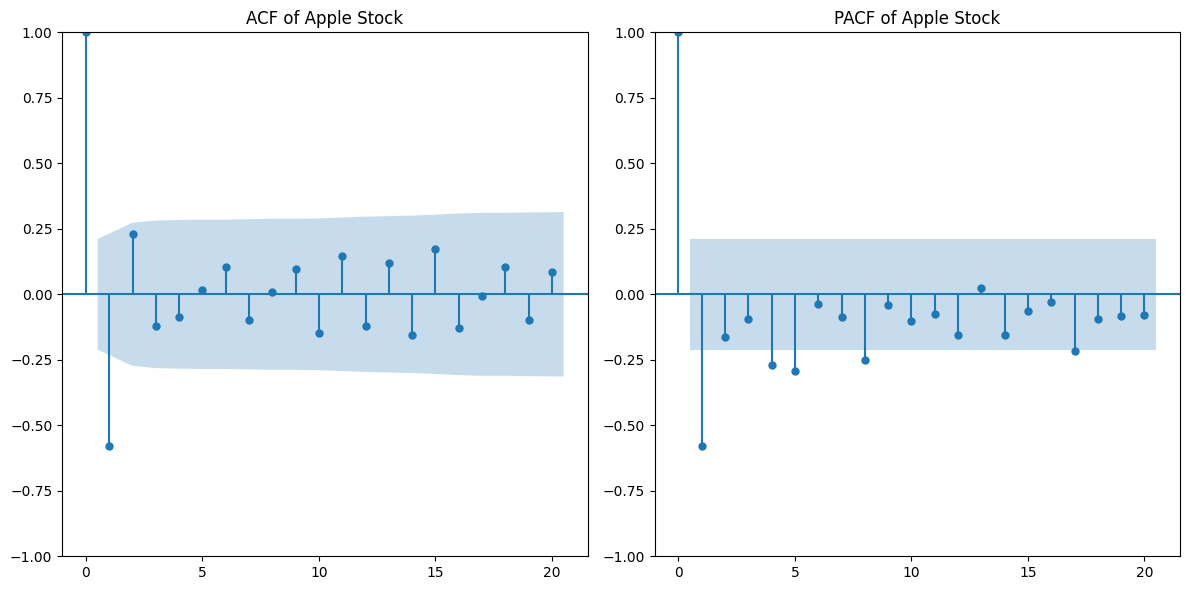

In [105]:
#@title #ACF and PACF plots


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df['Close'].diff().diff().dropna (), ax=plt.gca(), lags=20)
plt.title('ACF of Apple Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df['Close'].diff().diff().dropna (), ax=plt.gca(), lags=20, method='ywm')
plt.title('PACF of Apple Stock')
plt.tight_layout()
plt.show()


# Data Preprocessing
1) Handling missing values

1. Date with no value
2. Date is not present

i) Imputation - mean, median, mode, forward, backward

ii) Interpolation - linear, spline, polynomial

iii) Uring machine learning - Predictive modeling

2) Making data stationary

3) Handling Outliers

i) imputation and interpolation

ii) Transformation

iii) smoothening techniques


4) Resampling
- upsampling -> increasing frequency
- downsampling -> decreasing frequency


In [107]:
data = {
'Date': ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-12'],
'Price': [100, 101, 103, 106, 107,108,109,111],
}
# Create a DataFrame
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime (data['Date'])
data.set_index('Date', inplace=True)
data

,Price
Date,
2024-01-01,100
2024-01-02,101
2024-01-04,103
2024-01-07,106
2024-01-08,107
2024-01-09,108
2024-01-10,109
2024-01-12,111


In [108]:
# Create a complete date range
complete_index = pd.date_range (start='2024-01-01', end='2024-01-12', freq='D')

#Reindex the DataFrame
data= data. reindex (complete_index)

print("Reindexed DataFrame with Missing Dates: \n", data)

Reindexed DataFrame with Missing Dates: 
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0


In [113]:
#@title ## Imputation

#Mean Imputation
mean_value = data.mean()
data_mean_imputed = data.fillna (mean_value)
# Median Imputation
median_value = data.median()
data_median_imputed = data. fillna (median_value)
# Mode Imputation
mode_value = data.mode()
data_mode_imputed = data.fillna (mode_value.values[0][0])
# Forward Fill
data_ffill= data.ffill()
# Backward Fill
data_bfill= data.bfill()
print("Original Data: \n", data)
print('---\nMean: ',mean_value.values[0])
print("---\nMean Imputation: \n", data_mean_imputed)

print('---\nMedian: ',median_value.values[0])
print("---\nMedian Imputation: \n", data_median_imputed)

print('---\nMode: ',mode_value.values[0])
print("---\nMode Imputation: \n", data_mode_imputed)

print('---\nForward Fill: ',data_ffill)
print("---\nBackward FIll: \n", data_bfill)

Original Data: 
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0
---
Mean:  105.625
---
Mean Imputation: 
               Price
2024-01-01  100.000
2024-01-02  101.000
2024-01-03  105.625
2024-01-04  103.000
2024-01-05  105.625
2024-01-06  105.625
2024-01-07  106.000
2024-01-08  107.000
2024-01-09  108.000
2024-01-10  109.000
2024-01-11  105.625
2024-01-12  111.000
---
Median:  106.5
---
Median Imputation: 
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  106.5
2024-01-04  103.0
2024-01-05  106.5
2024-01-06  106.5
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  106.5
2024-01-12  111.0
---
Mode:  [100.]
---
Mode Imputation: 
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  100.0
2024-01-04  103.0
2024-01-05  100.0
2024-01-06  100.0
20

In [115]:
#@title ##Interpolation

# Linear Interpolation
data_linear_interp = data. interpolate (method="linear")

# Polynomial Interpolation (degree 2)
data_poly_interp = data.interpolate (method='polynomial', order=2)

# Spline Interpolation (order 2)
data_spline_interp= data. interpolate (method='spline', order=2)
print("\nLinear Interpolation: \n", data_linear_interp)
print("\nPolynomial Interpolation (degree 2):\n", data_poly_interp)
print("\nSpline Interpolation (order 2):\n", data_spline_interp)


Linear Interpolation: 
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Polynomial Interpolation (degree 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Spline Interpolation (order 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0


In [116]:
#@title ##Predictive modelling

data['Sales'] = [700, 900, 1000, 2000, 1500,3000,2300, 4000,5900, 6000,65000, 7000]
data

,Price,Sales
2024-01-01,100.0,700
2024-01-02,101.0,900
2024-01-03,NaN,1000
2024-01-04,103.0,2000
2024-01-05,NaN,1500
2024-01-06,NaN,3000
2024-01-07,106.0,2300
2024-01-08,107.0,4000
2024-01-09,108.0,5900
2024-01-10,109.0,6000


In [118]:
from sklearn.linear_model import LinearRegression
known_data = data.dropna (subset=['Price'])
missing_data = data[data['Price'].isna()]

# Train a model on known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price'])

# Predict missing values
predicted_values = model.predict(missing_data[['Sales']])
data.loc[data['Price'].isna (), 'Price'] = predicted_values

print(f"Data with predicted values: {data}")

Data with predicted values:                  Price  Sales
2024-01-01  100.000000    700
2024-01-02  101.000000    900
2024-01-03  101.675094   1000
2024-01-04  103.000000   2000
2024-01-05  102.434691   1500
2024-01-06  104.713483   3000
2024-01-07  106.000000   2300
2024-01-08  107.000000   4000
2024-01-09  108.000000   5900
2024-01-10  109.000000   6000
2024-01-11  198.903558  65000
2024-01-12  111.000000   7000


In [120]:
#@title ##Resampling

#Downsampling
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_data = df['Close'].resample('M').mean()
print("Monthly Downsampled data: \n", monthly_data)

Monthly Downsampled ata: 
 Date
2025-01-31    234.587000
2025-02-28    238.513684
2025-03-31    222.702857
2025-04-30    201.183810
2025-05-31    201.191429
Freq: ME, Name: Close, dtype: float64


In [122]:
#Upsampling

hourly_data = df["Close"].resample('H').interpolate(method='linear')
print("Hourly Upsampled data: \n", hourly_data)

Hourly Upsampled data: 
 Date
2025-01-02 00:00:00    243.850000
2025-01-02 01:00:00    243.829583
2025-01-02 02:00:00    243.809167
2025-01-02 03:00:00    243.788750
2025-01-02 04:00:00    243.768333
                          ...    
2025-05-08 20:00:00    198.356667
2025-05-08 21:00:00    198.400000
2025-05-08 22:00:00    198.443333
2025-05-08 23:00:00    198.486667
2025-05-09 00:00:00    198.530000
Freq: h, Name: Close, Length: 3049, dtype: float64
